
# Project: No Show Appointments Data Analysis

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning Procedure</a></li>
<li><a href="#clean">Cleaned Data</a></li>
<li><a href="#eda">Exploratory Data Analysis</a>
    <ul>
        <li><a href="#question1">Research Question 1: Does Gender affect the rate of show up?</a></li>
        <li><a href="#question2">Research Question 2: Does the Bosnia Familia Scholarship affect the rate of show up?</a></li>
        <li><a href="#question3">Research Question 3: What is the effect of disability on show up?</a></li>
        <li><a href="#question4">Research Question 4: How was the bosnia scholarship distributed among patients?</a></li>
    </ul>
</li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from about 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. I will be analyzing this dataset to answer the following questions.

 <li>Does Gender affect the rate of show up?</li>
        <li>Does the Bosnia Familia Scholarship affect the rate of show up?</li>
        <li>What is the effect of disability on show up?</li>
        <li>How was the bosnia scholarship distributed among patients?</li>

##### Import all necessary libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

#To display entire dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',  None)

<a id='wrangling'></a>
## Data Wrangling

#### Data Description (source: https://www.kaggle.com/joniarroba/noshowappointments)



<ul>
<li> 01 - Patient_Id.................. ........Identification of a patient </li>
<li> 02 - AppointmentID...................Identification of each appointment </li>
<li> 03 - Gender..............................(Male or Female).</li>
<li> 04 - ScheduledDay...................The day someone called or registered the appointment, this is before appointment of course.
</li>
<li> 05 - AppointmentDay................The day of the actual appointment, when they have to visit the doctor.</li>
<li> 06 - Age....................................How old is the patient.</li>
<li> 07 - Neighbourhood.................Where the appointment takes place. </li>
<li> 08 - Scholarship.......................True of False </li>
<li> 09 - Hipertension......................True of False </li>
<li> 10 - Diabetes............................True of False </li>
<li> 11 - Alcoholism..........................True of False </li>
<li> 12 - Handcap............................True of False </li>
<li> 13 - SMS_received...................1 or more messages sent to the patient. </li>
<li> 14 - No-show............................True of False </li>
</ul>



##### Load data and check first few rows and colums. 

In [2]:
df = pd.read_csv('C:/Users/user/Desktop/1.coding_datascience/UDACITY NANO DEGREE data analyst/Project 2/dataset.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


##### check number of observations and variables (we have 110527 observations and 14 variables)

In [3]:
print(df.shape)

(110527, 14)


##### check for missing data (there are no missing data)

In [4]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

##### check for duplicates entries (there are no duplicates entries)

In [5]:
df.duplicated().sum()

0

##### check unique values in each column

In [6]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

##### Check data types

In [7]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

##### Summary Statistics

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



<a id='cleaning'></a>

# Data Cleaning Procedure
<ul>
<li><a href="#reformat column">REFORMAT COLUMN NAME</a></li>
<li><a href="#examine">FURTHER EXAMINE SOME COLUMNS: age, handcap, sms_received</a></li>
<li><a href="#invert boolean">RENAME NO-SHOW TO SHOWED_UP AND INVERT VALUES</a></li>
<li><a href="#datatypes">CHANGE TO APPROPRIATE DATA TYPES</a></li>
<li><a href="#datetime">REFORMAT SCHEDULED DAY and APPOINTMENT DAY</a></li>
</ul>




<a id='reformat column'></a>
#### REFORMAT COLUMN NAME
<li>replace '-' with '_' </li>
<li>insert an underscore in between PatientID, AppointmentID, ScheduledDay and AppointmentDay</li>
<li>change all letter to lower case </li>
<li>rename ("Handcap" to handicap", "Hipertension" to "hypertension") </li>

the code below will print a list of the old column names

In [9]:
(df.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

the code below will replace '-' with '_'  (observe 'No-show')

In [10]:
df.rename(columns=lambda x: x.strip().replace("-", "_"), inplace=True)
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show'],
      dtype='object')

the regular expression below will insert an underscore to PatientId, AppointmentID, ScheduledDay and AppointmentDay and take all letters to lower case

In [11]:
df.rename(columns=lambda x: re.sub(r'(?<!^)(?=[A-Z])', '_', x).lower(), inplace=True)
df.columns

Index(['patient_id', 'appointment_i_d', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 's_m_s_received',
       'no_show'],
      dtype='object')

the code below will correct the effect of the regular expression by replacing (s_m_s with sms) (and i_d with id)

In [12]:
df.rename(columns=lambda x: x.replace('s_m_s', 'sms'), inplace=True)
df.rename(columns=lambda x: x.replace('i_d', 'id'), inplace=True)
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no_show'],
      dtype='object')

Finally, let's rename ("handcap" to handicap", "hipertension" to "hypertension")

In [13]:
df.rename(columns={'handcap': 'handicap', 'hipertension': 'hypertension'}, inplace=True)
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

let's view the formatted column names below

In [14]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='examine'></a>
#### FURTHER EXAMINE SOME COLUMNS
from the summary statistics, we can see that 

<li>age column have min value -1 and max value of 115years </li>
<li>handcap column have max value 4 which is not a characteristics of a boolean</li>
<li>sms_received column have min value of 0 and max value of 1 which is a characteristic of a boolean</li>

we can conclude that:

<li>the age -1 would have been an error entry so we will we drop the rows having negative values of age</li>
<li>the handcap and sms_received column would have been mistakenly swapped</li>

let's check how many rows have a negative value in the age column

In [15]:
print(sum(df.age < 0))

1


drop the single row having the negative value

In [16]:
df.drop(df[df.age < 0].index, inplace=True)

***HANDICAP Vs SMS_RECEIVED:*** first, compare the unique values in handicap and sms_received below

In [17]:
print(f'"sms_received": {df.sms_received.unique()}')
print(f'"handicap":     {df.handicap.unique()}')


"sms_received": [0 1]
"handicap":     [0 1 2 3 4]


let's swap the columns by renaming them below

In [18]:
df.rename(columns={'sms_received': 'handicap', 'handicap': 'sms_received'}, inplace=True)


In [19]:
print(f'"sms_received": {df.sms_received.unique()}')
print(f'"handicap":     {df.handicap.unique()}')

"sms_received": [0 1 2 3 4]
"handicap":     [0 1]


<a id='invert boolean'></a>
#### RENAME NO_SHOW TO SHOWED_UP AND INVERT VALUES
in the original dataset, it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up. this is because the column name is "no-show". We will changed the column name to showed_up and invert the values in that column. i.e change 'No' to 'Yes' and vice versa



we must first convert no_show column to a boolean type so that we can perform the inversion operation

In [20]:
df.no_show = df.no_show.apply(lambda x: x == 'Yes')

In [21]:
df.dtypes

patient_id         float64
appointment_id       int64
gender              object
scheduled_day       object
appointment_day     object
age                  int64
neighbourhood       object
scholarship          int64
hypertension         int64
diabetes             int64
alcoholism           int64
sms_received         int64
handicap             int64
no_show               bool
dtype: object

Now that 'no_show' is boolean, let's rename 'no_show' column and invert the values

In [22]:
df['showed_up'] = ~df.no_show

let's confirm the inversion below

In [23]:
df[['no_show', 'showed_up']].head()

,no_show,showed_up
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


drop the no_show column

In [24]:
df.drop('no_show', axis=1, inplace=True)

<a id='datatypes'></a>
#### CHANGE TO APPROPRIATE DATA TYPES


from the data description, **(scholarship, hypertension, diabetes, alcoholism and handicap)** are supposed to be boolean, so we will convert them to boolean

In [25]:
df['scholarship'] = df['scholarship'].astype(bool)
df['hypertension'] = df['hypertension'].astype(bool)
df['diabetes'] = df['diabetes'].astype(bool)
df['alcoholism'] = df['alcoholism'].astype(bool)
df['handicap'] = df['handicap'].astype(bool)


**patient_id** and **appointment_id** should be a string and not integer or floating number because they are used for identification. first, we will convert **patient_id** to integer so as to take care of decimal place and then convert both of them to strings

In [26]:
df.patient_id = df.patient_id.astype('int64').astype(str)
df.appointment_id = df.appointment_id.astype(str)

<a id='datetime'></a>
#### REFORMAT SCHEDULED DAY and APPOINTMENT DAY 
here, we will change the format of the date in the scheduled day and appointment day column to datetime


In [27]:
df.scheduled_day = pd.to_datetime(df.scheduled_day, infer_datetime_format=True)
df.appointment_day = pd.to_datetime(df.appointment_day, infer_datetime_format=True)

df[['scheduled_day', 'appointment_day']].head()

,scheduled_day,appointment_day
0,2016-04-29 18:38:08,2016-04-29
1,2016-04-29 16:08:27,2016-04-29
2,2016-04-29 16:19:04,2016-04-29
3,2016-04-29 17:29:31,2016-04-29
4,2016-04-29 16:07:23,2016-04-29


All datatype has been appropraitely fixed.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110526 non-null  object        
 1   appointment_id   110526 non-null  object        
 2   gender           110526 non-null  object        
 3   scheduled_day    110526 non-null  datetime64[ns]
 4   appointment_day  110526 non-null  datetime64[ns]
 5   age              110526 non-null  int64         
 6   neighbourhood    110526 non-null  object        
 7   scholarship      110526 non-null  bool          
 8   hypertension     110526 non-null  bool          
 9   diabetes         110526 non-null  bool          
 10  alcoholism       110526 non-null  bool          
 11  sms_received     110526 non-null  int64         
 12  handicap         110526 non-null  bool          
 13  showed_up        110526 non-null  bool          
dtypes: bool(6), datetime

<a id='clean'></a>
## Cleaned Data
let us save the cleaned data below so that we can use it for the Exploratory Data Analysis

In [29]:
df.to_csv('C:/Users/user/Desktop/1.coding_datascience/UDACITY NANO DEGREE data analyst/Project 2/df_cleaned.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

> with our cleaned data, we are ready to explore. we will create visualizations with the goal of addressing the research questions that we posed in the Introduction section. 

##### Load the cleaned data and check first few rows and colums. 

In [30]:
df = pd.read_csv('C:/Users/user/Desktop/1.coding_datascience/UDACITY NANO DEGREE data analyst/Project 2/df_cleaned.csv')
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,handicap,showed_up
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29 00:00:00,62,JARDIM DA PENHA,False,True,False,False,0,False,True
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29 00:00:00,56,JARDIM DA PENHA,False,False,False,False,0,False,True
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29 00:00:00,62,MATA DA PRAIA,False,False,False,False,0,False,True
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29 00:00:00,8,PONTAL DE CAMBURI,False,False,False,False,0,False,True
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29 00:00:00,56,JARDIM DA PENHA,False,True,True,False,0,False,True


<a id='question1'></a>
### Research Question 1: Does Gender affect the rate of show up?
> To know if gender affects the rate of show up, we have to know the total no of Male and Female patients and know the percentage of male and female who showed up for their apointment

##### check total number of Male and Female record. 

F    71839
M    38687
Name: gender, dtype: int64


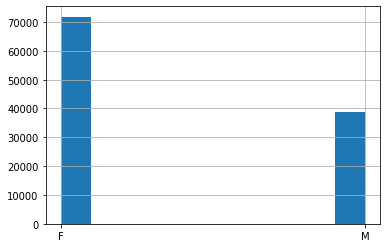

In [31]:
print(df.gender.value_counts())
df.gender.hist();

##### let's check the total no of Male and Female who showed up for their appointment 

In [32]:
gender_showed_up = df.groupby('gender').showed_up.value_counts()
gender_showed_up

gender  showed_up
F       True         57245
        False        14594
M       True         30962
        False         7725
Name: showed_up, dtype: int64

From the above counts: 
>**57245** out of **71839** female patients showed_up for their appointment
>
>**30962** out of **38687** male patients showed_up for their appointment
>
let us compare their percentage in the chart below

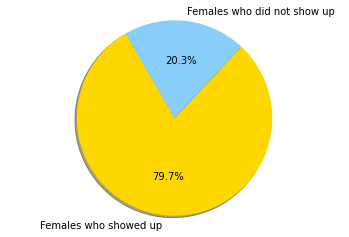

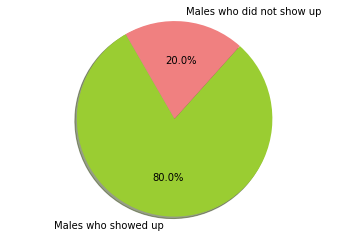

In [33]:
plt.figure(0)

# Data to plot
label1 = 'Females who showed up', 'Females who did not show up'
data1  = [57245, 14594]
color1 = ['gold','lightskyblue']
explode = (0.0, 0.0)  # explode 1st slice

# Plot
plt.pie(data1, explode=explode, labels=label1, colors=color1, autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')

plt.figure(1)

# Data to plot
label2 = 'Males who showed up', 'Males who did not show up'
data2  = [30962, 7725]
color2 = ['yellowgreen','lightcoral']
explode = (0.0, 0.0)  # explode 1st slice

# Plot
plt.pie(data2, explode=explode, labels=label2, colors=color2, autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')

plt.show() 

from the above chart, we can see that Gender did not affect the rate of show up. roughly 80% of both gender showed up while roughly 20% of both gender did not show up

<a id='question2'></a>
### Research Question 2: Does the Bosnia Familia Scholarship affect the rate of show up?

let's check how many patients have scholarship

False    99665
True     10861
Name: scholarship, dtype: int64


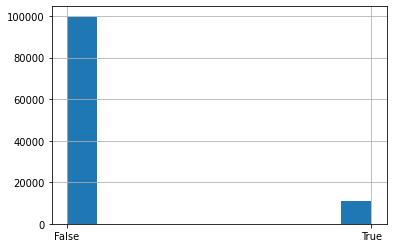

In [34]:
print(df.scholarship.value_counts())
df.scholarship.astype(str).hist();

10861 patients have the scholarship.

let us now check for the percentage of patients with scholarship who showed up for their appointment

In [35]:
Bosnia = df.groupby('scholarship').showed_up.value_counts()
Bosnia

scholarship  showed_up
False        True         79924
             False        19741
True         True          8283
             False         2578
Name: showed_up, dtype: int64

From the above counts:

>**79924 out of 99665** regular patients showed_up for their appointment
>
>**8283 out of 10861** scholarship patients showed_up for their appointment
>
note that regular patients are those that don't have the bosnia scholarship 

let us compare their percentage in the chart below

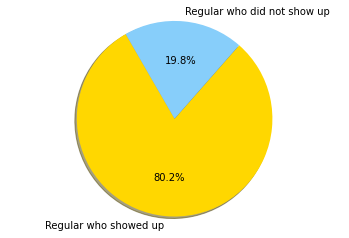

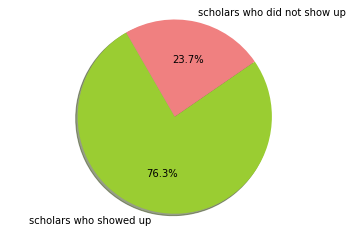

In [36]:
plt.figure(0)

# Data to plot
label1 = 'Regular who showed up', 'Regular who did not show up'
data1  = [79924, 19741]
color1 = ['gold','lightskyblue']
explode = (0.0, 0.0)  # explode 1st slice

# Plot
plt.pie(data1, explode=explode, labels=label1, colors=color1, autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')

plt.figure(1)

# Data to plot
label2 = 'scholars who showed up', 'scholars who did not show up'
data2  = [8283, 2578]
color2 = ['yellowgreen','lightcoral']
explode = (0.0, 0.0)  # explode 1st slice

# Plot
plt.pie(data2, explode=explode, labels=label2, colors=color2, autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')

plt.show() 

the Bosnia Familia Scholarship has an effect on rate of show up. Patients who do not have scholarship tend to show up more for their appointment.

<a id='question3'></a>
### Research Question 3: What is the effect of disability on show up?

False    75044
True     35482
Name: handicap, dtype: int64


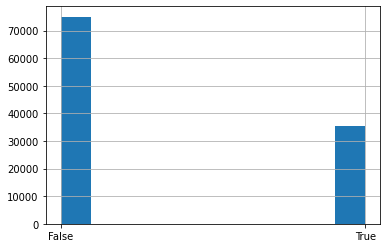

In [37]:
print(df.handicap.value_counts())
df.handicap.astype(str).hist();

In [38]:
disable = df.groupby('handicap').showed_up.value_counts()
disable

handicap  showed_up
False     True         62509
          False        12535
True      True         25698
          False         9784
Name: showed_up, dtype: int64

From the above counts:

>**62509 out of 75044** patients without disability showed_up for their appointment
>
>**25698 out of 35482** patients with disability showed_up for their appointment
>
let us compare their percentage in the chart below

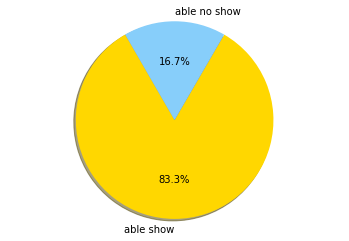

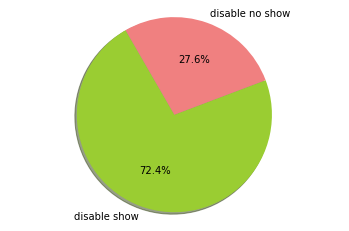

In [39]:
plt.figure(0)

# Data to plot
label1 = 'able show', 'able no show'
data1  = [62509, 12535]
color1 = ['gold','lightskyblue']
explode = (0.0, 0.0)  # explode 1st slice

# Plot
plt.pie(data1, explode=explode, labels=label1, colors=color1, autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')

plt.figure(1)

# Data to plot
label2 = 'disable show', 'disable no show'
data2  = [25698, 9784]
color2 = ['yellowgreen','lightcoral']
explode = (0.0, 0.0)  # explode 1st slice

# Plot
plt.pie(data2, explode=explode, labels=label2, colors=color2, autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')

plt.show() 

disability affects the rate of show up, patients without disabilities shows up more for their appointment

<a id='question4'></a>
### Research Question 4: how was the bosnia scholarship distributed among patients?

In [40]:
handischolar = df.groupby('handicap').scholarship.value_counts()
handischolar

handicap  scholarship
False     False          67688
          True            7356
True      False          31977
          True            3505
Name: scholarship, dtype: int64

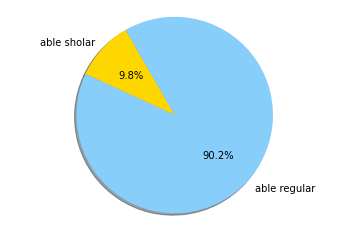

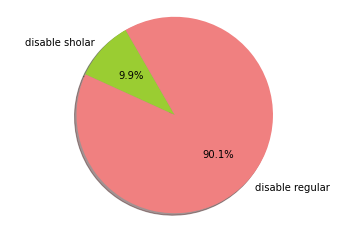

In [41]:
plt.figure(0)

# Data to plot
label1 = 'able sholar', 'able regular'
data1  = [7356, 67688]
color1 = ['gold','lightskyblue']
explode = (0.0, 0.0)  # explode 1st slice

# Plot
plt.pie(data1, explode=explode, labels=label1, colors=color1, autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')

plt.figure(1)

# Data to plot
label2 = 'disable sholar', 'disable regular'
data2  = [3505, 31977]
color2 = ['yellowgreen','lightcoral']
explode = (0.0, 0.0)  # explode 1st slice

# Plot
plt.pie(data2, explode=explode, labels=label2, colors=color2, autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')

plt.show() 

the bosnia scholarship was proportionately distributed between patients without disability(9.8%) and patients with disability(9.9%)

<a id='conclusions'></a>
## Conclusions


<ul>
<li> females schedule more medical appointment than males. it suggest women takes way more care of their health in comparison to man </li>
<li> the bosnia scholarship was proportionately distributed among patients with and without disability</li>
<li> it seems the bosnia scholarship contributes to no show of patients</li>
<li> comparing both genders who scheduled appointments, both genders have roughly the same show up rate</li>

**further Research Question:**
which of the features is the most important factor that determines if a patient showed-up. 